<a href="https://colab.research.google.com/github/arjungsanal/lab-AI/blob/main/Lab_Session_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: N-Queen without Recursion

Problem Description

The n-queen problem is the problem of placing n queens on an (n x n) chess board such that no queen can attack another queen. Implementation without recursion.

In [11]:
class QueenChessBoard:
    def __init__(self, size):
        # board has dimensions size x size
        self.size = size
        # columns[r] is a number c if a queen is placed at row r and column c.
        # columns[r] is out of range if no queen is place in row r.
        # Thus after all queens are placed, they will be at positions
        # (columns[0], 0), (columns[1], 1), ... (columns[size - 1], size - 1)
        self.columns = []

    def place_in_next_row(self, column):
        self.columns.append(column)

    def remove_in_current_row(self):
        return self.columns.pop()

    def is_this_column_safe_in_next_row(self, column):
        # index of next row
        row = len(self.columns)

        # check column
        for queen_column in self.columns:
            if column == queen_column:
                return False

        # check diagonal
        for queen_row, queen_column in enumerate(self.columns):
            if queen_column - queen_row == column - row:
                return False

        # check other diagonal
        for queen_row, queen_column in enumerate(self.columns):
            if ((self.size - queen_column) - queen_row
                == (self.size - column) - row):
                return False

        return True

    def display(self):
        for row in range(self.size):
            for column in range(self.size):
                if column == self.columns[row]:
                    print('Q', end=' ')
                else:
                    print('.', end=' ')
            print()


def solve_queen(size):
    """Display a chessboard for each possible configuration of placing n queens
    on an n x n chessboard and print the number of such configurations."""
    board = QueenChessBoard(size)
    number_of_solutions = 0

    row = 0
    column = 0
    # iterate over rows of board
    while True:
        # place queen in next row
        while column < size:
            if board.is_this_column_safe_in_next_row(column):
                board.place_in_next_row(column)
                row += 1
                column = 0
                break
            else:
                column += 1

        # if could not find column to place in or if board is full
        if (column == size or row == size):
            # if board is full, we have a solution
            if row == size:
                board.display()
                print()
                number_of_solutions += 1

                # small optimization:
                # In a board that already has queens placed in all rows except
                # the last, we know there can only be at most one position in
                # the last row where a queen can be placed. In this case, there
                # is a valid position in the last row. Thus we can backtrack two
                # times to reach the second last row.
                board.remove_in_current_row()
                row -= 1

            # now backtrack
            try:
                prev_column = board.remove_in_current_row()
            except IndexError:
                # all queens removed
                # thus no more possible configurations
                break
            # try previous row again
            row -= 1
            # start checking at column = (1 + value of column in previous row)
            column = 1 + prev_column

    print('Number of solutions:', number_of_solutions)


n = int(input('Enter n: '))
solve_queen(n)

Enter n: 4
. Q . . 
. . . Q 
Q . . . 
. . Q . 

. . Q . 
Q . . . 
. . . Q 
. Q . . 

Number of solutions: 2


# 2: N-Queen with backtracking implementation

Problem Description

The n-queen problem is the problem of placing n queens on an (n x n) chess board such that no queen can attack another queen. Implementation with back-tracking approach

In [12]:

def is_safe(board, row, col):
    # Check this row on left side
    for i in range(col):
        if board[row][i] == 1:
            return False

    # Check upper diagonal on left side
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    # Check lower diagonal on left side
    for i, j in zip(range(row, N, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    return True

def solve_n_queens(board, col):
    # base case: If all queens are placed
    if col >= N:
        return True

    # Consider this column and try placing the queen in all rows one by one
    for i in range(N):
        if is_safe(board, i, col):
            # Place this queen in board[i][col]
            board[i][col] = 1

            # recur to place rest of the queens
            if solve_n_queens(board, col + 1) == True:
                return True

            # If placing queen in board[i][col] doesn't lead to a solution, then remove queen from board[i][col]
            board[i][col] = 0

    # If queen can not be placed in any row in this column col then return false
    return False

n = int(input('Enter n: '))
solve_queen(n)


Enter n: 4
. Q . . 
. . . Q 
Q . . . 
. . Q . 

. . Q . 
Q . . . 
. . . Q 
. Q . . 

Number of solutions: 2


# 3: Min-Max Algorithm

Description : The minimax algorithm is used to choose the optimal move at any point in a game. ( Game Theory )

Reference Link : https://www.geeksforgeeks.org/minimax-algorithm-in-game-theory-set-1-introduction/

In [13]:
# This function implements the MiniMax algorithm.

# Parameters:
#   curDepth (int): Current depth in the recursion tree.
#   nodeIndex (int): Index of the current node in the score array.
#   maxTurn (bool): Indicates whether it's the maximizing player's turn.
#   scores (list[int]): List containing scores for each leaf node.
#   targetDepth (int): Maximum depth allowed for exploration.

def minimax(curDepth, nodeIndex, maxTurn, scores, targetDepth):

  # Base case: If the current depth reaches the target depth,
  # return the score at the corresponding leaf node.
  if (curDepth == targetDepth):
    return scores[nodeIndex]

  # If it's the maximizing player's turn:
  if (maxTurn):
    # Recursively explore both child nodes (left and right) and
    # return the maximum of their scores. This ensures the maximizing
    # player chooses the move that leads to the highest possible score.
    return max(minimax(curDepth + 1, nodeIndex * 2, False, scores, targetDepth),
               minimax(curDepth + 1, nodeIndex * 2 + 1, False, scores, targetDepth))

  # If it's the minimizing player's turn (opponent):
  else:
    # Recursively explore both child nodes and return the minimum of their scores.
    # This ensures the minimizing player chooses the move that leads to the
    # lowest possible score for the maximizing player.
    return min(minimax(curDepth + 1, nodeIndex * 2, True, scores, targetDepth),
               minimax(curDepth + 1, nodeIndex * 2 + 1, True, scores, targetDepth))

# Driver code

# Sample list of scores representing the potential values at leaf nodes
scores = [3, 5, 2, 9, 12, 5, 23, 23]

# Calculate the maximum depth of the tree based on the number of scores
# (assuming a balanced binary tree representation)
treeDepth = math.log(len(scores), 2)

# Print the optimal value (the score maximizing player can achieve)
print("The optimal value is : ", end="")
print(minimax(0, 0, True, scores, treeDepth))


The optimal value is : 12


# 4: Breadth First Search Algorithm

Description : BFS algorithm

A standard BFS implementation puts each vertex of the graph into one of two categories:

Visited
Not Visited

The purpose of the algorithm is to mark each vertex as visited while avoiding cycles.

The algorithm works as follows:

1. Start by putting any one of the graph's vertices at the back of a queue.
2. Take the front item of the queue and add it to the visited list.
3. Create a list of that vertex's adjacent nodes. Add the ones which aren't in the visited list to the back of the queue.
4. Keep repeating steps 2 and 3 until the queue is empty.

The graph might have two different disconnected parts so to make sure that we cover every vertex, we can also run the BFS algorithm on every node

Reference : https://www.programiz.com/dsa/graph-bfs

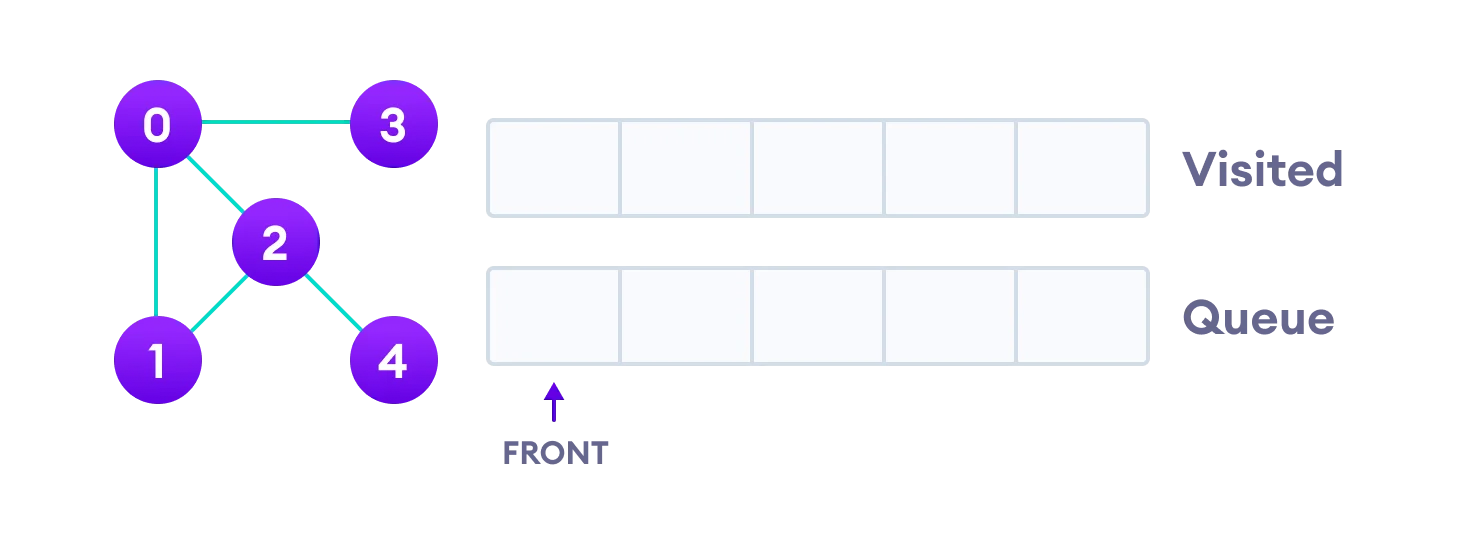

In [14]:
# BFS algorithm in Python


import collections

# BFS algorithm
def bfs(graph, root):

    visited, queue = set(), collections.deque([root])
    visited.add(root)

    while queue:

        # Dequeue a vertex from queue
        vertex = queue.popleft()
        print(str(vertex) + " ", end="")

        # If not visited, mark it as visited, and
        # enqueue it
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)


if __name__ == '__main__':
    graph = {0: [1, 2], 1: [2], 2: [3], 3: [1, 2]}
    print("Following is Breadth First Traversal: ")
    bfs(graph, 0)


Following is Breadth First Traversal: 
0 1 2 3 

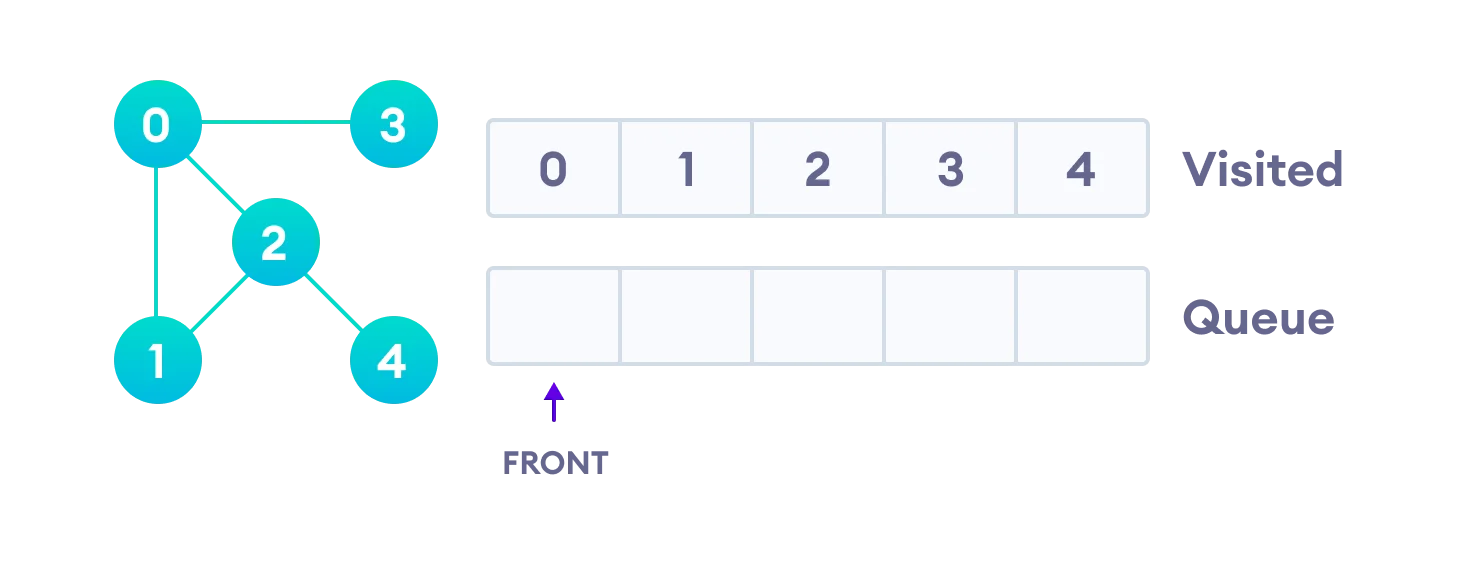


# 5: Depth First Search Algorithm

Description : Depth First Search Algorithm

A standard DFS implementation puts each vertex of the graph into one of two categories:

Visited
Not Visited

The purpose of the algorithm is to mark each vertex as visited while avoiding cycles.

The DFS algorithm works as follows:

1. Start by putting any one of the graph's vertices on top of a stack.
2. Take the top item of the stack and add it to the visited list.
3. Create a list of that vertex's adjacent nodes. Add the ones which aren't in the visited list to the top of the stack.
4. Keep repeating steps 2 and 3 until the stack is empty.

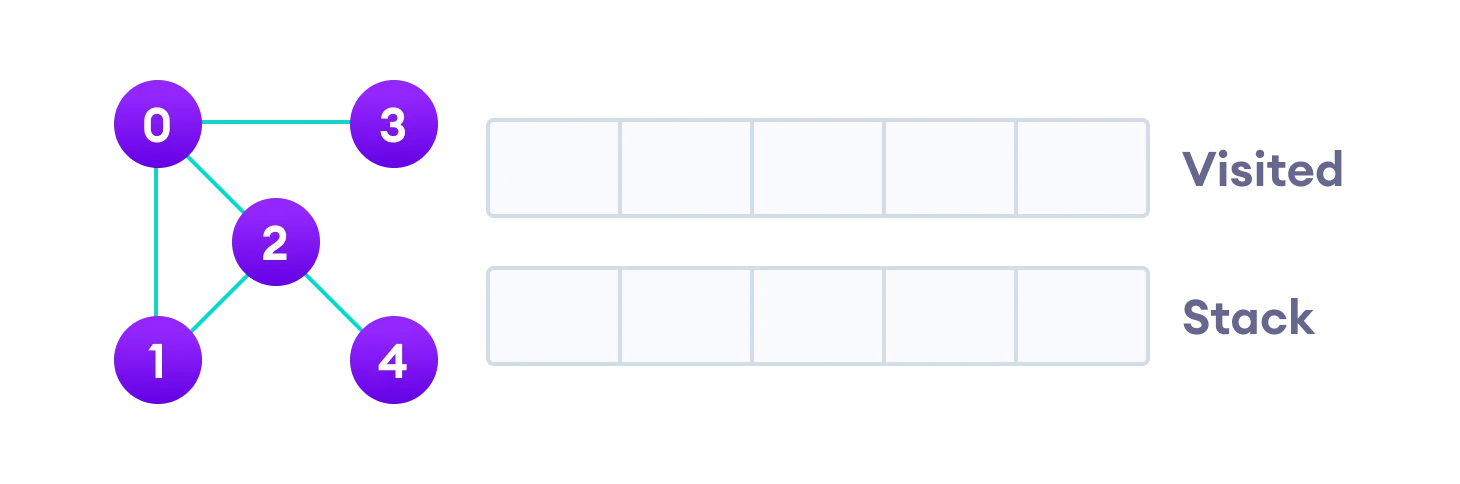

In [15]:
# DFS algorithm in Python


# DFS algorithm
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)

    print(start)

    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited


graph = {'0': set(['1', '2']),
         '1': set(['0', '3', '4']),
         '2': set(['0']),
         '3': set(['1']),
         '4': set(['2', '3'])}

dfs(graph, '0')

0
1
4
2
3
3
2


{'0', '1', '2', '3', '4'}

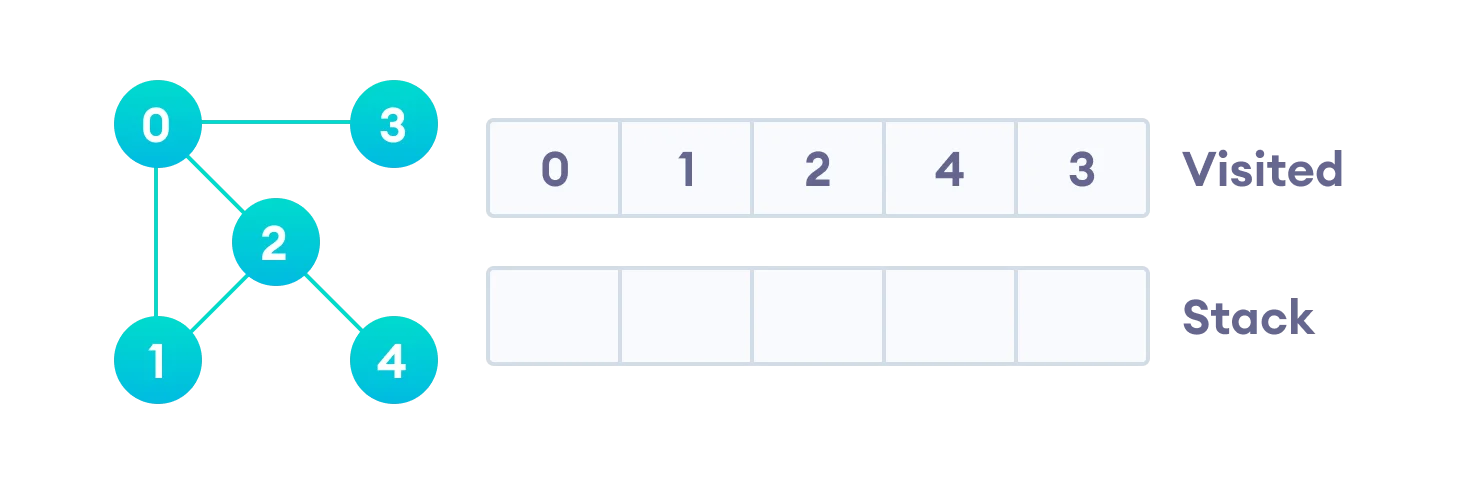

# 6 : A* Algorithm

Description : A* Search algorithm is one of the best and popular technique used in path-finding and graph traversals.

Reference : https://www.mygreatlearning.com/blog/a-search-algorithm-in-artificial-intelligence/#what-is-a-search-algorithm


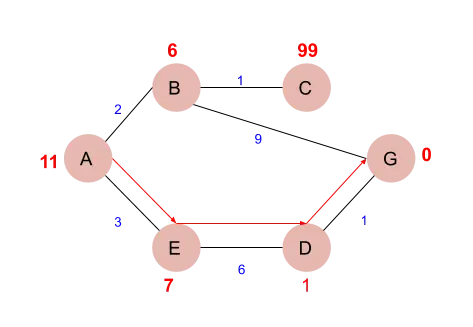

In [16]:
def aStarAlgo(start_node, stop_node):

        open_set = set(start_node)
        closed_set = set()
        g = {} #store distance from starting node
        parents = {}# parents contains an adjacency map of all nodes

        #ditance of starting node from itself is zero
        g[start_node] = 0
        #start_node is root node i.e it has no parent nodes
        #so start_node is set to its own parent node
        parents[start_node] = start_node


        while len(open_set) > 0:
            n = None

            #node with lowest f() is found
            for v in open_set:
                if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                    n = v


            if n == stop_node or Graph_nodes[n] == None:
                pass
            else:
                for (m, weight) in get_neighbors(n):
                    #nodes 'm' not in first and last set are added to first
                    #n is set its parent
                    if m not in open_set and m not in closed_set:
                        open_set.add(m)
                        parents[m] = n
                        g[m] = g[n] + weight


                    #for each node m,compare its distance from start i.e g(m) to the
                    #from start through n node
                    else:
                        if g[m] > g[n] + weight:
                            #update g(m)
                            g[m] = g[n] + weight
                            #change parent of m to n
                            parents[m] = n

                            #if m in closed set,remove and add to open
                            if m in closed_set:
                                closed_set.remove(m)
                                open_set.add(m)

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                path = []

                while parents[n] != n:
                    path.append(n)
                    n = parents[n]

                path.append(start_node)

                path.reverse()

                print('Path found: {}'.format(path))
                return path


            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_set.remove(n)
            closed_set.add(n)

        print('Path does not exist!')
        return None

#define fuction to return neighbor and its distance
#from the passed node
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
#for simplicity we ll consider heuristic distances given
#and this function returns heuristic distance for all nodes
def heuristic(n):
        H_dist = {
            'A': 11,
            'B': 6,
            'C': 99,
            'D': 1,
            'E': 7,
            'G': 0,

        }

        return H_dist[n]

#Describe your graph here
Graph_nodes = {
    'A': [('B', 2), ('E', 3)],
    'B': [('C', 1),('G', 9)],
    'C': None,
    'E': [('D', 6)],
    'D': [('G', 1)],

}
aStarAlgo('A', 'G')

Path found: ['A', 'E', 'D', 'G']


['A', 'E', 'D', 'G']